# Disability X Disorder

In [1]:
import pandas as pd

df = pd.read_excel('.\Disability_Disorder\DisabilityDisorderAssociation.xlsx', index_col=None)
Disorder_disability = pd.read_excel('.\Disability_Disorder\Disorder_disability.xlsx', index_col=None)

In [2]:
df.head()

,Disorder_id,Disability,Disability_id,Frequency_class,Frequency_class_id,Temporality_disability,Temporality_disability_id,Severity_disability,Severity_disability_id,Loss_of_ability,Disability_type,Defined
0,1,Seeing/watching,4,Very frequent,27201.0,Permanent limitation,27180.0,Moderate,27236.0,n,Disability,y
1,1,Hearing/listening,5,Frequent,27208.0,Acquisition delay,27187.0,Unspecified,27271.0,n,Disability,y
2,1,Acquiring language,7,Very frequent,27201.0,Acquisition delay,27187.0,Moderate,27236.0,n,Disability,y
3,1,Learning to read,8,Very frequent,27201.0,Acquisition delay,27187.0,Low,27222.0,n,Disability,y
4,1,Learning to write,9,Very frequent,27201.0,Acquisition delay,27187.0,Severe,27250.0,n,Disability,y


In [3]:
df.dtypes

Disorder_id                    int64
Disability                    object
Disability_id                  int64
Frequency_class               object
Frequency_class_id           float64
Temporality_disability        object
Temporality_disability_id    float64
Severity_disability           object
Severity_disability_id       float64
Loss_of_ability               object
Disability_type               object
Defined                       object
dtype: object

In [4]:
Disorder_disability.dtypes

Disorder_id           int64
Disorder_name        object
Disorder_id_2         int64
Disorder_type        object
Disorder_type_id      int64
Disorder_group       object
Disorder_group_id     int64
dtype: object

In [5]:
Disorder_disability.shape

(910, 7)

## Here the COUNT of several categories

In [6]:
df.Disability.value_counts()

Practicing sports                                                            612
Performing vigorous activities (climbing, running, jumping, swimming,...)    593
Shopping                                                                     561
Engaging in paid work in a standard environment                              559
Walking long distances                                                       555
                                                                            ... 
Light                                                                          6
Sound                                                                          5
Orienting oneself                                                              5
Time-related changes                                                           3
Understanding                                                                  1
Name: Disability, Length: 128, dtype: int64

In [7]:
print('number of disabilities:', df.Disability.nunique())

number of disabilities: 128


In [8]:
df.Disorder_id.value_counts()

857    350
304    274
758    269
531    247
846    240
      ... 
347      1
101      1
82       1
744      1
818      1
Name: Disorder_id, Length: 593, dtype: int64

In [9]:
print('number of rare diseases:', df.Disorder_id.nunique())

number of rare diseases: 593


In [10]:
df.Frequency_class.value_counts()

Occasional       11034
Frequent         10841
Very frequent     9170
Name: Frequency_class, dtype: int64

In [11]:
df['Frequency_class'] = pd.Categorical(df['Frequency_class'], ["Very frequent", "Frequent", "Occasional"])

In [12]:
df.Temporality_disability.value_counts()

Permanent limitation    21438
Transient limitation     5429
Acquisition delay        4179
Name: Temporality_disability, dtype: int64

In [13]:
df.Severity_disability.value_counts()

Severe                9663
Moderate              9113
Low                   5505
Unspecified           4038
Complete              2724
Moderate to severe       3
Name: Severity_disability, dtype: int64

In [14]:
df['Severity_disability'] = pd.Categorical(df['Severity_disability'], ["Complete", "Severe", "Moderate", 
                                                                       'Moderate to severe', 'Low', 'Unspecified'])

In [15]:
df.Loss_of_ability.value_counts()

n    21643
y    11443
Name: Loss_of_ability, dtype: int64

In [16]:
df.Disability_type.value_counts()

Disability              31943
Environmental factor     1143
Name: Disability_type, dtype: int64

## Most Commons disabilities

In [17]:
df["count"] = 1
df2 = df.groupby(["Disorder_id", "Disability"], as_index=False)["count"].sum()
del df2['count']
df2

,Disorder_id,Disability
0,1,Accessing higher education
1,1,Acquiring language
2,1,Attending mainstream school
3,1,Attending preschool
4,1,Attending school in an adapted mainstream/spec...
...,...,...
23159,910,Travelling
23160,910,Undertaking a complex/multiple task
23161,910,Undertaking a simple task
23162,910,Walking long distances


In [18]:
Disab_count = pd.DataFrame(df2.Disability.value_counts())
top_40_dis = Disab_count.head(40)
top_40_dis.reset_index(inplace=True)
top_40_dis = top_40_dis.rename(columns = {'index':'Disability','Disability':'Count' })
top_40_dis.dtypes

Disability    object
Count          int64
dtype: object

In [19]:
top_40_dis

,Disability,Count
0,Practicing sports,410
1,Engaging in paid work in a standard environment,388
2,"Performing vigorous activities (climbing, runn...",378
3,Travelling,367
4,Performing professional tasks,365
5,Taking part in community life,365
6,Doing housework,365
7,Seeking employment,364
8,Shopping,362
9,Driving,359


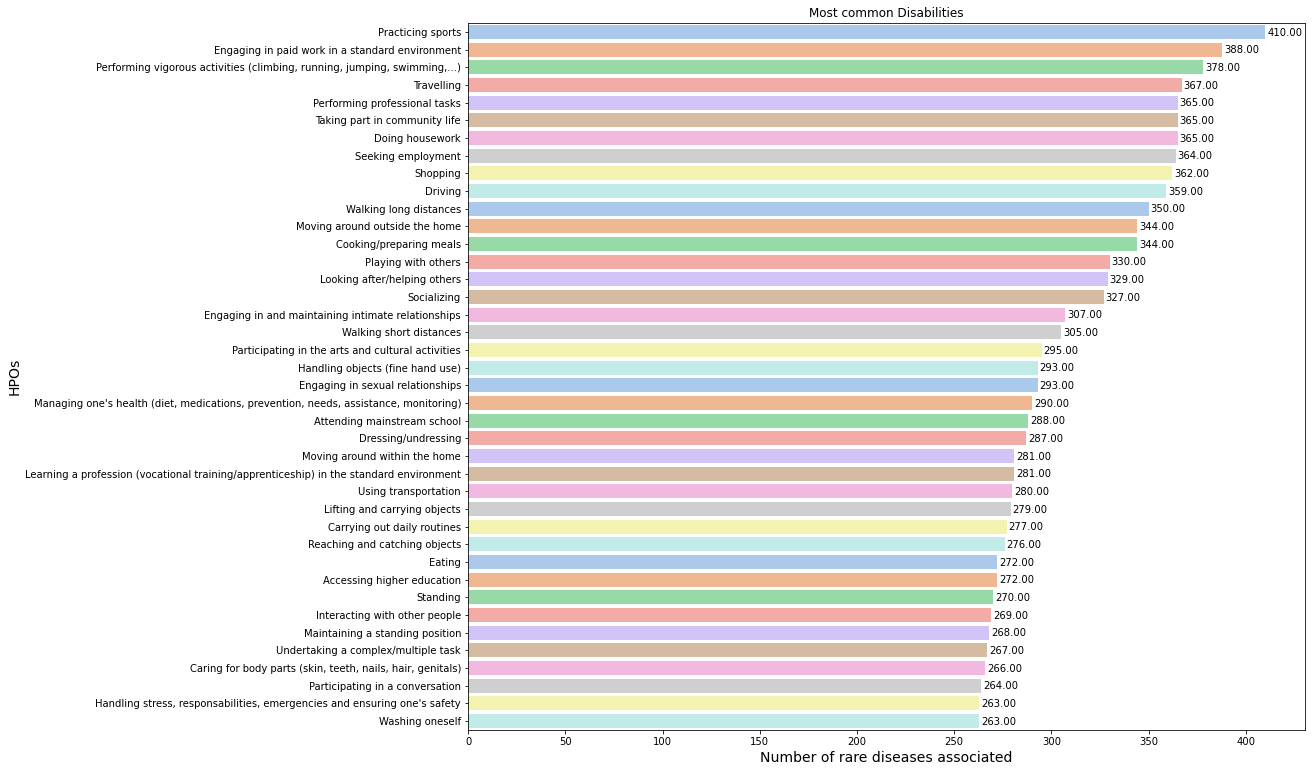

In [40]:
# importing the required library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
    
from matplotlib import pyplot


# a4_dims = (11.7, 8.27)
# fig, ax = pyplot.subplots(figsize=a4_dims)    
plt.figure(figsize=(15,13))

r = sns.barplot(x = "Count", y = "Disability", data = top_40_dis, palette = 'pastel')

for p in r.patches:
    width = p.get_width()
    plt.text(10+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

plt.xlabel("Number of rare diseases associated", size=14)
plt.ylabel("HPOs", size=14) 
plt.title('Most common Disabilities')

plt.show()

## Number Disabilities per disorder

In [29]:
df["count"] = 1
df2 = df.groupby(["Disorder_id", "Disability"], as_index=False)["count"].sum()
del df2['count']
df2

,Disorder_id,Disability
0,1,Accessing higher education
1,1,Acquiring language
2,1,Attending mainstream school
3,1,Attending preschool
4,1,Attending school in an adapted mainstream/spec...
...,...,...
23159,910,Travelling
23160,910,Undertaking a complex/multiple task
23161,910,Undertaking a simple task
23162,910,Walking long distances


In [30]:
df2["count"] = 1
df_disorder_dis_count = df2.groupby(["Disorder_id"], as_index=False)["count"].sum()

In [31]:
print('Descriptive statistis of the number of disabilities per disease')
df_disorder_dis_count['count'].describe()

Descriptive statistis of the number of disabilities per disease


count    593.000000
mean      39.062395
std       28.741588
min        1.000000
25%       12.000000
50%       36.000000
75%       63.000000
max       97.000000
Name: count, dtype: float64

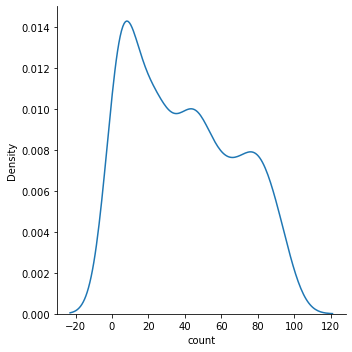

In [32]:
sns.displot(df_disorder_dis_count, x="count", kind="kde")

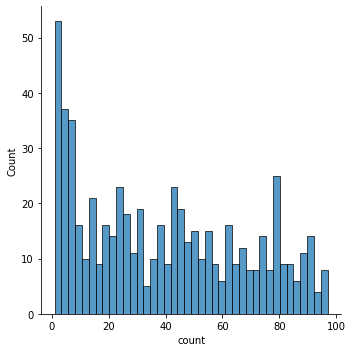

In [33]:
sns.displot(df_disorder_dis_count, x="count", bins=40)

# Analysing a disease
#### ALS as example

df_disea contains all the info we need. Then we filter it with the disease we want.

In [34]:
df_disea = df.merge(Disorder_disability, on='Disorder_id', how='left')
df_disea = df_disea[['Disorder_id_2', 'Disorder_name', 'Disability', 'Frequency_class', 
                    'Temporality_disability', 'Severity_disability', 'Loss_of_ability',
                   'Disability_type', 'Defined']]
df_disea = df_disea.sort_values(by=['Frequency_class', 'Severity_disability'])

In [2]:
import pandas as pd
df_disea = pd.read_excel('.\df_disea.xlsx', index_col=None)

In [3]:
df_disea.head()

,Unnamed: 0,Disorder_id_2,Disorder_name,Disability,Frequency_class,Temporality_disability,Severity_disability,Loss_of_ability,Disability_type,Defined
0,304,960,Werner syndrome,Walking long distances,Very frequent,Permanent limitation,Complete,y,Disability,y
1,323,960,Werner syndrome,"Performing vigorous activities (climbing, runn...",Very frequent,Permanent limitation,Complete,y,Disability,y
2,401,894,West syndrome,Learning to read,Very frequent,Permanent limitation,Complete,n,Disability,y
3,402,894,West syndrome,Learning to write,Very frequent,Permanent limitation,Complete,n,Disability,y
4,403,894,West syndrome,Learning to calculate,Very frequent,Permanent limitation,Complete,n,Disability,y


In [4]:
print('Number of disabilities associated to the disease:', 
      (df_disea[df_disea['Disorder_id_2'] == 106]).Disability.nunique())

# to display all the rows. Change none with a number to hange settings
pd.set_option('display.max_rows', None)
df_disea[df_disea['Disorder_id_2'] == 106]

Number of disabilities associated to the disease: 74


,Unnamed: 0,Disorder_id_2,Disorder_name,Disability,Frequency_class,Temporality_disability,Severity_disability,Loss_of_ability,Disability_type,Defined
9439,15528,106,Amyotrophic lateral sclerosis,Reading,Frequent,Permanent limitation,Complete,y,Disability,y
9440,15530,106,Amyotrophic lateral sclerosis,Writing,Frequent,Permanent limitation,Complete,y,Disability,y
11015,15342,106,Amyotrophic lateral sclerosis,Focusing attention,Frequent,Permanent limitation,Severe,y,Disability,y
11016,15345,106,Amyotrophic lateral sclerosis,Memorizing and retrieving,Frequent,Permanent limitation,Severe,y,Disability,y
11017,15348,106,Amyotrophic lateral sclerosis,Thinking and reasoning,Frequent,Permanent limitation,Severe,y,Disability,y
11018,15351,106,Amyotrophic lateral sclerosis,Making decisions/taking initiatives/finding so...,Frequent,Permanent limitation,Severe,y,Disability,y
11019,15362,106,Amyotrophic lateral sclerosis,Producing nonverbal messages,Frequent,Permanent limitation,Severe,y,Disability,y
11020,15365,106,Amyotrophic lateral sclerosis,Writing messages,Frequent,Permanent limitation,Severe,y,Disability,y
11021,15368,106,Amyotrophic lateral sclerosis,Participating in a conversation,Frequent,Permanent limitation,Severe,y,Disability,y
11022,15371,106,Amyotrophic lateral sclerosis,Using communication devices,Frequent,Permanent limitation,Severe,y,Disability,y
